## Import Dataset & Library

In [ ]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix


In [ ]:
file_id = '1XmGInZOKbGvrj0-F89irq4Ot-qHZ0FWK'
dwn_url = 'https://drive.google.com/uc?id=' + file_id
gdown.download(dwn_url, 'df.csv', quiet=False)
df = pd.read_csv('df.csv',delimiter=';')
df.dropna(inplace=True)
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({1:'laki-laki',2:'perempuan'})

Downloading...
From: https://drive.google.com/uc?id=1XmGInZOKbGvrj0-F89irq4Ot-qHZ0FWK
To: /content/df.csv
100%|██████████| 5.32k/5.32k [00:00<00:00, 7.75MB/s]


In [ ]:
def kondisi_mental(row):
    max_value = row.max()
    if max_value == 1:
        return 'Normal'
    else:
        return row[['Anxiety', 'Depresi', 'Stress']].idxmax()

df['KondisiMental'] = df[['Anxiety', 'Depresi', 'Stress']].apply(kondisi_mental, axis=1)
df['Usia'] = df['Usia'].astype('int')

## Helper Function

In [ ]:
def infoData(data):
    lst = []
    total_rows = len(data)

    for column in data.columns:
        missing_values = data[column].isnull().sum()
        missing_percentage = (missing_values / total_rows) * 100
        data_type = data.dtypes[column]

        if data_type == 'object' or data[column].nunique()<=10:
            mode_value = data[column].mode()[0]
            info = {
                'Columns': column,
                'Unique Values': data[column].unique(),
                'Nunique Values': data[column].nunique(),
                'Missing Values': missing_values,
                'Missing Percentage': missing_percentage,
                'Data Type': data_type,
                'Mode': mode_value
            }
        else:
            mean_value = data[column].mean()
            info = {
                'Columns': column,
                'Unique Values': data[column].unique(),
                'Nunique Values': data[column].nunique(),
                'Missing Values': missing_values,
                'Missing Percentage': missing_percentage,
                'Data Type': data_type,
                'Mean': mean_value
            }

        lst.append(info)

    data_info = pd.DataFrame(lst)
    return data_info

def plot_data(df):
    num_columns = len(df.columns)
    rows = round(num_columns * 0.5)
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10, 7*rows))
    axes = axes.flatten()

    for i, var in enumerate(df.columns):
        if len(df[var].unique()) <= 10 :
            sns.countplot(data=df, x=var, ax=axes[i])
            axes[i].set_title(f'Count Plot of {var}')
        else:
            sns.histplot(data=df[var], ax=axes[i])
            axes[i].set_title(f'Density Plot of {var}')
            axes[i].set_xlabel(var)
    plt.show()

## Exploratory Data Analysis

In [ ]:
infoData(df.drop(columns=['Sempel']))

,Columns,Unique Values,Nunique Values,Missing Values,Missing Percentage,Data Type,Mean,Mode
0,Usia,"[70, 72, 78, 68, 71, 73, 69, 81, 75, 65, 79, 6...",24,0,0.0,int64,68.2125,NaN
1,Jenis Kelamin,"[laki-laki, perempuan]",2,0,0.0,object,NaN,perempuan
2,P1 S,"[0.0, 1.0, 2.0, 3.0]",4,0,0.0,float64,NaN,0.0
3,p2 A,"[0.0, 2.0, 1.0, 3.0]",4,0,0.0,float64,NaN,0.0
4,p3 D,"[0.0, 2.0, 1.0, 3.0]",4,0,0.0,float64,NaN,0.0
5,P4 A,"[0.0, 2.0, 3.0, 1.0]",4,0,0.0,float64,NaN,0.0
6,p5 D,"[0.0, 1.0, 3.0, 2.0]",4,0,0.0,float64,NaN,0.0
7,p6 S,"[0.0, 2.0, 1.0, 3.0]",4,0,0.0,float64,NaN,0.0
8,p7 A,"[0.0, 1.0, 2.0, 3.0]",4,0,0.0,float64,NaN,0.0
9,p8 S,"[0.0, 1.0, 3.0, 2.0]",4,0,0.0,float64,NaN,0.0


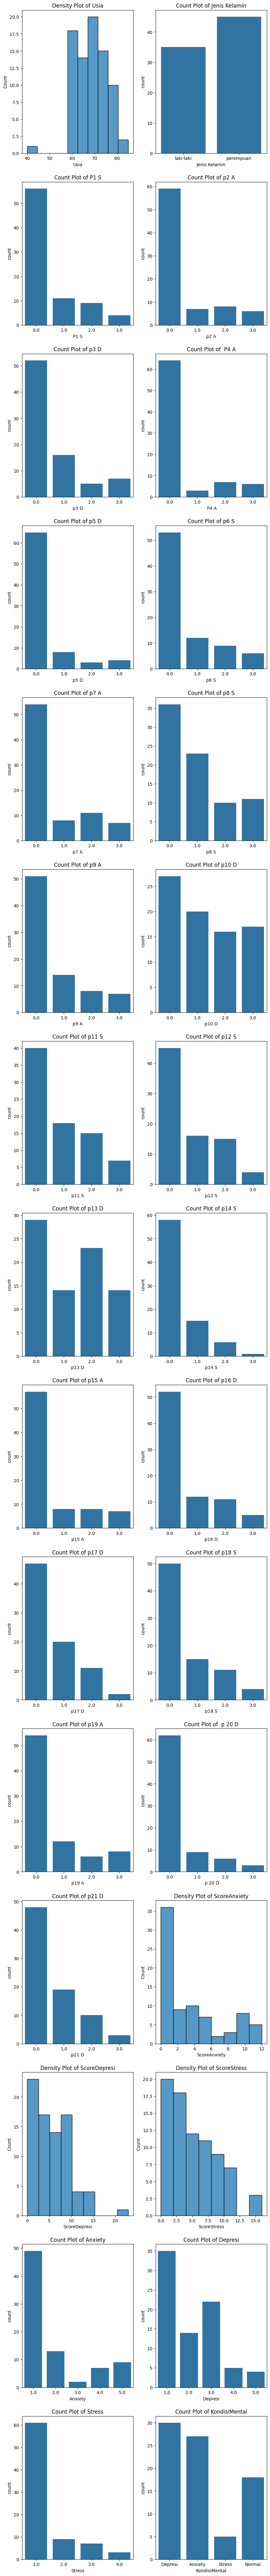

In [ ]:
plot_data(df.drop(columns=['Sempel']))

## Preprocessing

In [ ]:
df = pd.get_dummies(df, columns=['Jenis Kelamin'], dtype=int)

In [ ]:
label_encoder = LabelEncoder()
df['KondisiMental'] = label_encoder.fit_transform(df['KondisiMental'])

In [ ]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("KondisiMental Label Encoder Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label} -> {encoded_value}")

KondisiMental Label Encoder Mapping:
Anxiety -> 0
Depresi -> 1
Normal -> 2
Stress -> 3


In [ ]:
df['KondisiMental'].value_counts()

KondisiMental
1    30
0    27
2    18
3     5
Name: count, dtype: int64

Terdapat Imbalance pada KondisiMental

## Train Test Split & Resampled

In [ ]:
X = df[['Usia','ScoreAnxiety', 'ScoreDepresi', 'ScoreStress','Jenis Kelamin_laki-laki','Jenis Kelamin_perempuan']]
y = df['KondisiMental']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=42)

In [ ]:
print(X_train)

    Usia  ScoreAnxiety  ScoreDepresi  ScoreStress  Jenis Kelamin_laki-laki  \
38    77           0.0           0.0          0.0                        1   
62    65          11.0          13.0         14.0                        0   
7     73           0.0           7.0          5.0                        1   
28    68           0.0           6.0          0.0                        0   
63    65           0.0           0.0          1.0                        0   
22    60           8.0           1.0          3.0                        0   
15    75           2.0           3.0          6.0                        1   
47    63           4.0           6.0          7.0                        0   
50    72           5.0           9.0          9.0                        0   
29    63           1.0           2.0          6.0                        0   
1     72           1.0           7.0          3.0                        1   
3     68           0.0           1.0         11.0               

In [ ]:
print(X_test)

    Usia  ScoreAnxiety  ScoreDepresi  ScoreStress  Jenis Kelamin_laki-laki  \
40    60           1.0           5.0          3.0                        0   
45    73           2.0           4.0          2.0                        0   
36    74           5.0           1.0          0.0                        0   
51    65           4.0           4.0          5.0                        0   
39    62          12.0           9.0         11.0                        0   
44    61           2.0           0.0          0.0                        0   
65    60           0.0           8.0          0.0                        0   
67    67           1.0           6.0          4.0                        1   
30    60           1.0           3.0          0.0                        0   
32    60           1.0           1.0          2.0                        0   
33    70           0.0           6.0          0.0                        1   
16    73           0.0           6.0          0.0               

In [ ]:
# Melakukan resampling untuk training set agar kelas pada target lebih seimbang

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

y_resampled.value_counts()

KondisiMental
2    22
0    22
1    22
3    22
Name: count, dtype: int64

## Modeling

### With Resampling

In [ ]:
model = GaussianNB()
model.fit(X_resampled, y_resampled)

y_pred_train = model.predict(X_resampled)
y_pred_test = model.predict(X_test)

print(f'Evaluation Metric for data train with resampled dataset\n {classification_report(y_resampled, y_pred_train)}')

print(f'Evaluation Metric for data test with resampled dataset\n {classification_report(y_test, y_pred_test)}')


Evaluation Metric for data train with resampled dataset
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.95      0.95      0.95        22
           2       1.00      0.86      0.93        22
           3       0.92      1.00      0.96        22

    accuracy                           0.95        88
   macro avg       0.96      0.95      0.95        88
weighted avg       0.96      0.95      0.95        88

Evaluation Metric for data test with resampled dataset
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      1.00      0.94         8
           2       0.67      0.50      0.57         4
           3       0.00      0.00      0.00         1

    accuracy                           0.85        20
   macro avg       0.61      0.62      0.61        20
weighted avg       0.80      0.85      0.82        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


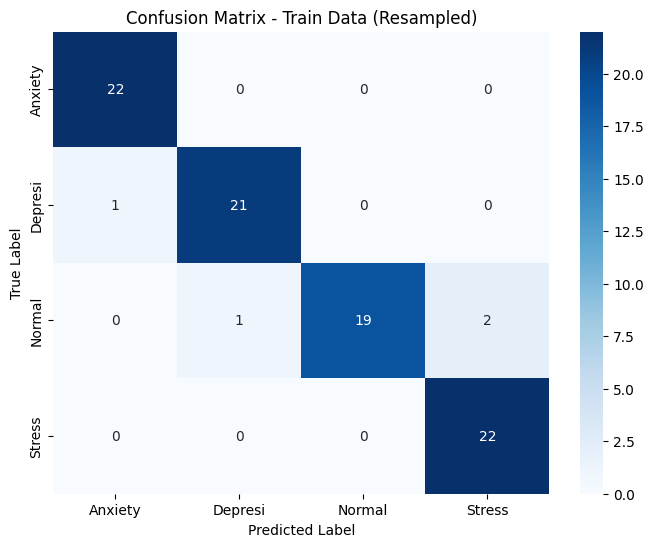

In [ ]:
# Confusion Matrix for Train Data
cm_train = confusion_matrix(y_resampled, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Train Data (Resampled)')
plt.show()


### No Resampling

In [ ]:
model2 = GaussianNB()
model2.fit(X_train, y_train)

y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(X_test)

print(f'Evaluation Metric for data train\n {classification_report(y_train, y_pred_train2)}')

print(f'Evaluation Metric for data test \n {classification_report(y_test, y_pred_test2)}')


Evaluation Metric for data train
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.98        22
           2       1.00      0.93      0.96        14
           3       0.80      1.00      0.89         4

    accuracy                           0.97        60
   macro avg       0.94      0.97      0.95        60
weighted avg       0.97      0.97      0.97        60

Evaluation Metric for data test 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       0.80      1.00      0.89         4
           3       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.70      0.75      0.72        20
weighted avg       0.91      0.95      0.93        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


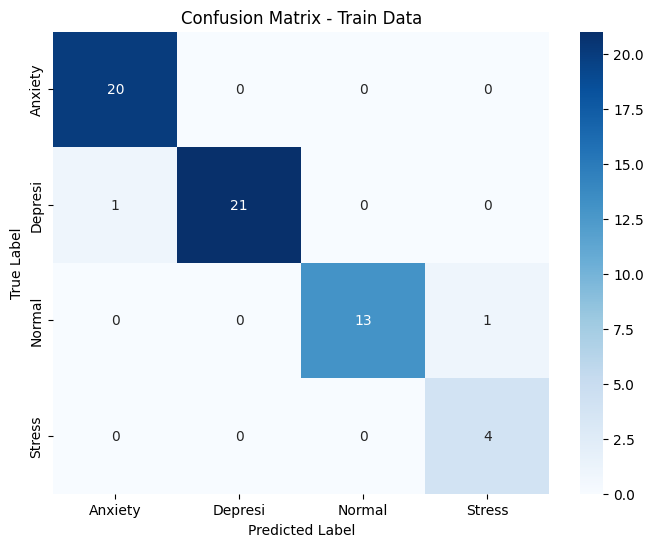

In [ ]:
# Confusion Matrix for Train Data
cm_train2 = confusion_matrix(y_train, y_pred_train2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train2, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Train Data')
plt.show()

## Kesimpulan

Model naive bayes yang di train menggunakan dataset tanpa resampling menunjukkan performa yang lebih bagus dengan akurasi f1 skor 0.95 untuk data test dan 0.97 untuk data train. Jika dibandingkan dengan model naive bayes yang di train menggunakan dataset resampling mendapatkan akurasi f1 skor 0.85 untuk data test dan 0.95 untuk data train. Meskipun kedua model mendapatkan akurasi yang cukup bagus, namun perlu diperhatikan bahwa dataset yang digunakan untuk train model cukup kecil dan memiliki ketidakseimbangan antar kelas yang cukup timpang yang menyebabkan adanya kemungkinan overfitting.